![Logo da Resilia](https://www.resilia.com.br/wp-content/uploads/2021/08/logo.png)

-- Contexto deste Projeto :
Nossa equipe equipe foi escalada pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma
análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.
A ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural no Brasil, que mantém o Banco de Dados de Exploração e Produção (BDEP); divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil; realiza e divulga pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos; promove estudos sobre o potencial petrolífero e o desenvolvimento do setor; entre outras atividades.
Realizaremos a análise exploratória a partir das fontes de dados disponíveis no portal gov.br. Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C) contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.



In [164]:
#importando bibliotecas necessárias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

--- Detalhes do projeto:

● A análise deve responder às seguintes perguntas:

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?


Além disso, vocês deverão pensar em mais três perguntas que deverão ser respondidas por scripts SQL


1 - Existe alguma bandeira que atua em mais de um estado ?
2 - Compensou mais por etanol ou Gasolina no mes de Julho ?
3 - Compensou mais por Etanol ou Gasolina no mes de Junho ?

- Importando dados dos mes 05 para realizar a analise comparativa com os meses 06 e 07

In [307]:
mes05 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv', sep= ';')
mes05.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes05.head()

,RegiaoSigla,EstadoSigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,"3,79",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,"4,69",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,"5,49",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA


- Importando dados do mes 07 (JULHO) de 2023

In [3]:
mes07 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-07.csv', delimiter=';')# utilizado o comando delimitador pois nao lia o csv porque o delimitador dele era ponto e virgula
mes07.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes07.head()

,RegiaoSigla,EstadoSigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/07/2023,"4,87",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/07/2023,"3,27",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,03/07/2023,"6,95",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,03/07/2023,"6,93",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,03/07/2023,"6,99",NaN,R$ / litro,IPIRANGA


- Importando dados do mes 06 (JUNHO) de 2023

In [7]:
mes06 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv', delimiter=';')
mes06.columns = ['RegiaoSigla',
              'EstadoSigla','Municipio','Revenda','CNPJ da Revenda',
              'Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto',
              'Data da Coleta','Valor de Venda',
              'Valor de Compra','Unidade de Medida','Bandeira']
mes06.head()

,RegiaoSigla,EstadoSigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,01/06/2023,"4,31",NaN,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,01/06/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,ETANOL,01/06/2023,"4,19",NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,"5,36",NaN,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA,01/06/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA


- Criando copia dos dados e das colunas que iremos utilizar DO MES 07

In [308]:
copia_mes05 = mes05[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes05

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
0,SE,SP,SOROCABA,ETANOL,"3,79",BRANCA
1,SE,SP,SOROCABA,GASOLINA,"4,69",BRANCA
2,N,AC,CRUZEIRO DO SUL,ETANOL,"5,49",IPIRANGA
3,N,AC,CRUZEIRO DO SUL,GASOLINA ADITIVADA,"6,97",IPIRANGA
4,N,AC,CRUZEIRO DO SUL,GASOLINA,"6,97",IPIRANGA
...,...,...,...,...,...,...
58485,SE,SP,VALINHOS,ETANOL,"3,49",IPIRANGA
58486,SE,SP,VALINHOS,GASOLINA ADITIVADA,"4,99",IPIRANGA
58487,SE,SP,VALINHOS,GASOLINA,"4,69",IPIRANGA
58488,SE,SP,PIRASSUNUNGA,ETANOL,"3,49",IPIRANGA


In [8]:
copia_mes07 = mes07[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes07

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
0,SE,SP,SOROCABA,GASOLINA,"4,87",BRANCA
1,SE,SP,SOROCABA,ETANOL,"3,27",BRANCA
2,N,AC,CRUZEIRO DO SUL,GASOLINA,"6,95",VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,GASOLINA,"6,93",IPIRANGA
4,N,AC,CRUZEIRO DO SUL,GASOLINA ADITIVADA,"6,99",IPIRANGA
...,...,...,...,...,...,...
54510,SE,MG,TEOFILO OTONI,GASOLINA ADITIVADA,"5,49",RAIZEN
54511,SE,MG,TEOFILO OTONI,ETANOL,"3,79",RAIZEN
54512,S,RS,LAJEADO,GASOLINA,"5,39",CHARRUA
54513,S,RS,LAJEADO,GASOLINA ADITIVADA,"5,49",CHARRUA


In [309]:
gasolinaComumMaio = copia_mes05[copia_mes05['Produto'] == 'GASOLINA'].copy()
gasolinaComumMaio

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
1,SE,SP,SOROCABA,GASOLINA,"4,69",BRANCA
4,N,AC,CRUZEIRO DO SUL,GASOLINA,"6,97",IPIRANGA
7,NE,AL,ARAPIRACA,GASOLINA,"5,89",VIBRA ENERGIA
8,NE,AL,ARAPIRACA,GASOLINA,"5,77",VIBRA ENERGIA
11,NE,AL,ARAPIRACA,GASOLINA,"5,74",IPIRANGA
...,...,...,...,...,...,...
58480,SE,MG,OLIVEIRA,GASOLINA,"5,09",BRANCA
58482,S,RS,TORRES,GASOLINA,"4,99",IPIRANGA
58484,S,RS,TORRES,GASOLINA,"4,99",VIBRA ENERGIA
58487,SE,SP,VALINHOS,GASOLINA,"4,69",IPIRANGA


In [124]:
gasolinaComumJulho = copia_mes07[copia_mes07['Produto'] == 'GASOLINA'].copy()
gasolinaComumJulho

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
0,SE,SP,SOROCABA,GASOLINA,"4,87",BRANCA
2,N,AC,CRUZEIRO DO SUL,GASOLINA,"6,95",VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,GASOLINA,"6,93",IPIRANGA
6,NE,AL,ARAPIRACA,GASOLINA,"5,98",VIBRA ENERGIA
9,NE,AL,ARAPIRACA,GASOLINA,"5,79",BRANCA
...,...,...,...,...,...,...
54500,SE,SP,ASSIS,GASOLINA,"5,69",IPIRANGA
54503,SE,SP,SAO VICENTE,GASOLINA,"5,04",IPIRANGA
54506,NE,BA,CAETITE,GASOLINA,"6,34",IPIRANGA
54509,SE,MG,TEOFILO OTONI,GASOLINA,"5,39",RAIZEN


In [311]:
# Remover linhas com valores não numéricos na coluna 'Valor de Venda'
gasolinaComumMaio['Valor de Venda'] = pd.to_numeric(gasolinaComumMaio['Valor de Venda'], errors='coerce')
gasolinaComumMaio.dropna(subset=['Valor de Venda'], inplace=True)

# Calcular a média dos preços de venda após a limpeza
mediaGasolinaComumMaio = gasolinaComumMaio['Valor de Venda'].mean()
print(f"A média dos preços de venda da Gasolina comum em Julho é: {mediaGasolinaComumMaio}")
mediaFormatadaGasolinaComum = "{:.2f}".format(mediaGasolinaComumJulho)

print(f"A média formatada dos preços de venda da Gasolina Comum em Maio é: {mediaFormatadaGasolinaComum}")

A média dos preços de venda da Gasolina comum em Julho é: 5.766666666666667
A média formatada dos preços de venda da Gasolina Comum em Maio é: 5.77


In [313]:
etanolMaio = copia_mes05[copia_mes05['Produto'] == 'ETANOL'].copy()
etanolMaio

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
0,SE,SP,SOROCABA,ETANOL,"3,79",BRANCA
2,N,AC,CRUZEIRO DO SUL,ETANOL,"5,49",IPIRANGA
5,NE,AL,ARAPIRACA,ETANOL,"4,58",VIBRA ENERGIA
9,NE,AL,ARAPIRACA,ETANOL,"4,29",IPIRANGA
12,NE,AL,ARAPIRACA,ETANOL,"4,69",IPIRANGA
...,...,...,...,...,...,...
58466,SE,SP,CRUZEIRO,ETANOL,"3,97",RAIZEN
58475,NE,RN,MOSSORO,ETANOL,"4,88",BRANCA
58478,SE,MG,OLIVEIRA,ETANOL,"3,79",BRANCA
58485,SE,SP,VALINHOS,ETANOL,"3,49",IPIRANGA


In [324]:
etanolMaio['Valor de Venda'] = pd.to_numeric(etanolMaio['Valor de Venda'], errors='coerce')
etanolMaio.dropna(subset=['Valor de Venda'], inplace=True)
mediaEtanolMaio = etanolMaio['Valor de Venda'].mean()
print(f"A média dos preços de venda do Etanol em Julho é: {mediaEtanolMaio}")

A média dos preços de venda do Etanol em Julho é: 4.375


In [315]:
gasolinaAditivadaMaio = copia_mes05[copia_mes05['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaMaio

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
3,N,AC,CRUZEIRO DO SUL,GASOLINA ADITIVADA,"6,97",IPIRANGA
6,NE,AL,ARAPIRACA,GASOLINA ADITIVADA,"5,89",VIBRA ENERGIA
10,NE,AL,ARAPIRACA,GASOLINA ADITIVADA,"5,94",IPIRANGA
13,NE,AL,ARAPIRACA,GASOLINA ADITIVADA,"5,94",IPIRANGA
16,NE,AL,DELMIRO GOUVEIA,GASOLINA ADITIVADA,"6,69",VIBRA ENERGIA
...,...,...,...,...,...,...
58476,NE,RN,MOSSORO,GASOLINA ADITIVADA,"5,76",BRANCA
58479,SE,MG,OLIVEIRA,GASOLINA ADITIVADA,"5,09",BRANCA
58481,S,RS,TORRES,GASOLINA ADITIVADA,"5,19",IPIRANGA
58483,S,RS,TORRES,GASOLINA ADITIVADA,"4,99",VIBRA ENERGIA


In [320]:


#Remover linhas com valores não numéricos na coluna 'Valor de Venda'
gasolinaAditivadaMaio['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaMaio['Valor de Venda'], errors='coerce')
gasolinaAditivadaMaio.dropna(subset=['Valor de Venda'], inplace=True)

# Calcular a média dos preços de venda após a limpeza
mediaGasolinaAditivadaMaio = gasolinaAditivadaMaio['Valor de Venda'].mean()
print(f"A média dos preços de venda da Gasolina Aditivada em Maio é: {mediaGasolinaAditivadaMaio}")
mediaFormatadaGasolinaAditivada = "{:.2f}".format(mediaGasolinaAditivadaMaio)

print(f"A média formatada dos preços de venda da Gasolina Aditivada em Maio é: {mediaFormatadaGasolinaAditivada}")

A média dos preços de venda da Gasolina Aditivada em Maio é: 5.40625
A média formatada dos preços de venda da Gasolina Aditivada em Maio é: 5.41


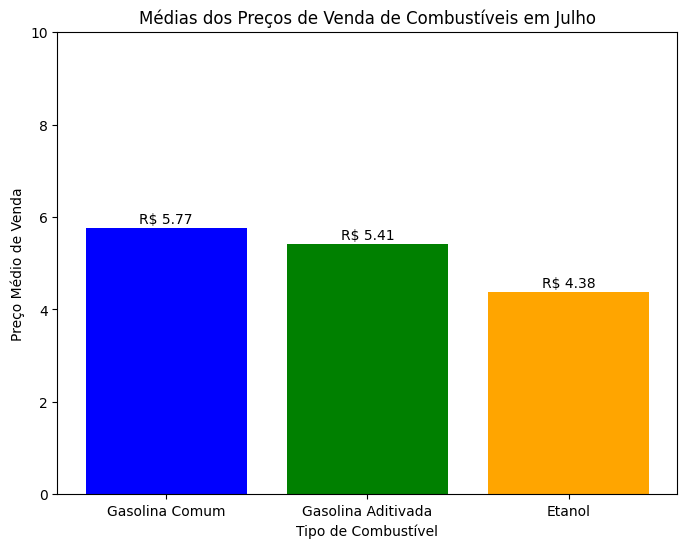

In [332]:
import matplotlib.pyplot as plt

# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.77, 5.41, 4.375]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em Julho')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()



Com Base nestes Valores encontraremos a resposta para a pergunta 1

2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [10]:
# Remover linhas com valores não numéricos na coluna 'Valor de Venda'
gasolinaComumJulho['Valor de Venda'] = pd.to_numeric(gasolinaComumJulho['Valor de Venda'], errors='coerce')
gasolinaComumJulho.dropna(subset=['Valor de Venda'], inplace=True)

# Calcular a média dos preços de venda após a limpeza
mediaGasolinaComumJulho = gasolinaComumJulho['Valor de Venda'].mean()
print(f"A média dos preços de venda da Gasolina comum em Julho é: {mediaGasolinaComumJulho}")


A média dos preços de venda da Gasolina comum em Julho é: 5.7727272727272725


In [11]:
#O código acima usa pd.to_numeric() para converter os valores na coluna 'Valor de Venda' em valores numéricos, enquanto converte qualquer valor não numérico em NaN. Em seguida, dropna() é usado para remover as linhas com valores NaN na coluna 'Valor de Venda'.

In [12]:
mediaFormatadaGasolinaComum = "{:.2f}".format(mediaGasolinaComumJulho)

print(f"A média formatada dos preços de venda da Gasolina Comum em Julho é: {mediaFormatadaGasolinaComum}")

A média formatada dos preços de venda da Gasolina Comum em Julho é: 5.77


In [142]:
etanolJulho = copia_mes07[copia_mes07['Produto'] == 'ETANOL'].copy()
etanolJulho

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
1,SE,SP,SOROCABA,ETANOL,"3,27",BRANCA
5,N,AC,CRUZEIRO DO SUL,ETANOL,"5,49",IPIRANGA
8,NE,AL,ARAPIRACA,ETANOL,"4,78",VIBRA ENERGIA
11,NE,AL,ARAPIRACA,ETANOL,"4,69",BRANCA
14,NE,AL,ARAPIRACA,ETANOL,"4,99",IPIRANGA
...,...,...,...,...,...,...
54502,SE,SP,ASSIS,ETANOL,"3,79",IPIRANGA
54505,SE,SP,SAO VICENTE,ETANOL,"3,39",IPIRANGA
54508,NE,BA,CAETITE,ETANOL,"4,69",IPIRANGA
54511,SE,MG,TEOFILO OTONI,ETANOL,"3,79",RAIZEN


In [14]:
etanolJulho['Valor de Venda'] = pd.to_numeric(etanolJulho['Valor de Venda'], errors='coerce')
etanolJulho.dropna(subset=['Valor de Venda'], inplace=True)
mediaEtanolJulho = etanolJulho['Valor de Venda'].mean()
print(f"A média dos preços de venda do Etanol em Julho é: {mediaEtanolJulho}")

A média dos preços de venda do Etanol em Julho é: 4.125


In [15]:
mediaFormatadaEtanolJulho = "{:.2f}".format(mediaEtanolJulho)
media_arredondada = round(mediaEtanolJulho, 2)# utilizado comando round para arredondar a media para facilitar operacoes com outros valores
print(f"A média formatada dos preços de venda do etanol em Julho é: {media_arredondada}")
media_arredondada = round(mediaEtanolJulho, 2)

A média formatada dos preços de venda do etanol em Julho é: 4.12


In [141]:
gasolinaAditivadaJulho = copia_mes07[copia_mes07['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJulho

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
4,N,AC,CRUZEIRO DO SUL,GASOLINA ADITIVADA,"6,99",IPIRANGA
7,NE,AL,ARAPIRACA,GASOLINA ADITIVADA,"5,98",VIBRA ENERGIA
10,NE,AL,ARAPIRACA,GASOLINA ADITIVADA,"5,99",BRANCA
13,NE,AL,ARAPIRACA,GASOLINA ADITIVADA,"6,09",IPIRANGA
16,NE,AL,DELMIRO GOUVEIA,GASOLINA ADITIVADA,"6,25",DISLUB
...,...,...,...,...,...,...
54501,SE,SP,ASSIS,GASOLINA ADITIVADA,"5,79",IPIRANGA
54504,SE,SP,SAO VICENTE,GASOLINA ADITIVADA,"5,34",IPIRANGA
54507,NE,BA,CAETITE,GASOLINA ADITIVADA,"6,44",IPIRANGA
54510,SE,MG,TEOFILO OTONI,GASOLINA ADITIVADA,"5,49",RAIZEN


In [17]:
gasolinaAditivadaJulho['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaJulho['Valor de Venda'], errors='coerce')
gasolinaAditivadaJulho.dropna(subset=['Valor de Venda'], inplace=True)
mediaGasolinaAditivadaJulho = gasolinaAditivadaJulho['Valor de Venda'].mean()
print(f"A média dos preços de venda da Gasolina Aditivada em Julho é: {mediaGasolinaAditivadaJulho}")

A média dos preços de venda da Gasolina Aditivada em Julho é: 5.777777777777778


In [19]:
mediaFormatadaGasolinaAditivadaJulho = "{:.2f}".format(mediaGasolinaAditivadaJulho)
print(f"A média dos preços de venda da Gasolina Aditivada em Julho é: {mediaFormatadaGasolinaAditivadaJulho}")

A média dos preços de venda da Gasolina Aditivada em Julho é: 5.78


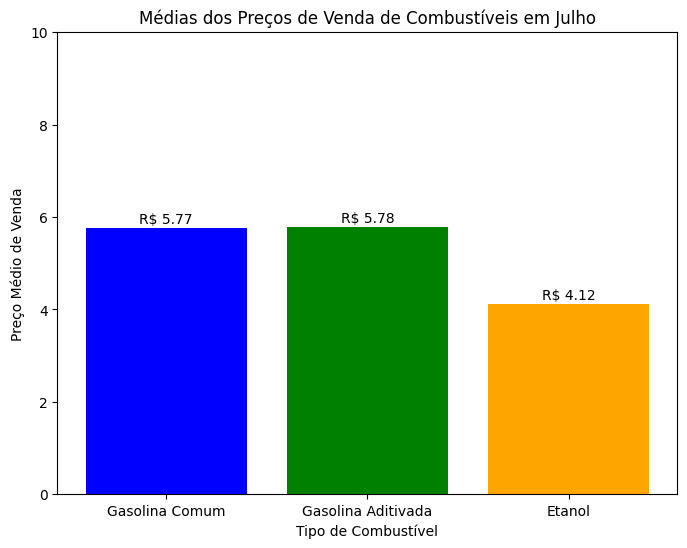

In [333]:


# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.77, 5.78, 4.12]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em Julho')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

# COPIANDO OS DADOS DO MES 06 E FILTRANDO AS TABELAS NECESSARIAS

In [140]:
copia_mes06 = mes06[['RegiaoSigla' , 'EstadoSigla', 'Municipio', 'Produto' , 'Valor de Venda','Bandeira']].copy()
copia_mes06

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
0,NE,BA,IRECE,ETANOL,"4,31",VIBRA ENERGIA
1,NE,BA,IRECE,GASOLINA,"5,39",VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,ETANOL,"4,19",VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,GASOLINA ADITIVADA,"5,36",VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,GASOLINA,"5,29",VIBRA ENERGIA
...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,GASOLINA,"5,64",BRANCA
49037,NE,BA,CAMACARI,ETANOL,"4,44",BRANCA
49038,NE,BA,CAMACARI,GASOLINA ADITIVADA,"5,64",BRANCA
49039,NE,BA,CAMACARI,GASOLINA,"5,64",BRANCA


- Limpando os dados utlizando dropnan

In [121]:
cleaned06 = copia_mes06.dropna()

In [139]:
gasolinaComumJunho = copia_mes06[copia_mes06['Produto'] == 'GASOLINA'].copy()
gasolinaComumJunho

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
1,NE,BA,IRECE,GASOLINA,"5,39",VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,GASOLINA,"5,29",VIBRA ENERGIA
6,SE,ES,COLATINA,GASOLINA,"5,59",RAIZEN
9,SE,ES,COLATINA,GASOLINA,"5,55",VIBRA ENERGIA
12,SE,ES,COLATINA,GASOLINA,"5,59",IPIRANGA
...,...,...,...,...,...,...
49031,SE,RJ,ITAGUAI,GASOLINA,"5,59",RAIZEN
49033,SE,SP,ITAPOLIS,GASOLINA,"5,49",BRANCA
49036,NE,BA,CAMACARI,GASOLINA,"5,64",BRANCA
49039,NE,BA,CAMACARI,GASOLINA,"5,64",BRANCA


In [23]:
gasolinaComumJunho['Valor de Venda'] = pd.to_numeric(gasolinaComumJunho['Valor de Venda'], errors='coerce')
gasolinaComumJunho.dropna(subset=['Valor de Venda'], inplace=True)
mediaGasolinaComumJunho = gasolinaComumJunho['Valor de Venda'].mean()
print(f"A média dos preços de venda da Gasolina Comum em Junho é: {mediaGasolinaComumJunho}")

A média dos preços de venda da Gasolina Comum em Julho é: 5.75


In [143]:
etanolJunho = copia_mes06[copia_mes06['Produto'] == 'ETANOL'].copy()
etanolJunho

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
0,NE,BA,IRECE,ETANOL,"4,31",VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,ETANOL,"4,19",VIBRA ENERGIA
7,SE,ES,COLATINA,ETANOL,"4,79",VIBRA ENERGIA
10,SE,ES,COLATINA,ETANOL,"4,67",IPIRANGA
15,CO,GO,CATALAO,ETANOL,"3,89",VIBRA ENERGIA
...,...,...,...,...,...,...
49027,CO,GO,GOIANIA,ETANOL,"3,94",IPIRANGA
49030,SE,RJ,ITAGUAI,ETANOL,"4,39",RAIZEN
49032,SE,SP,ITAPOLIS,ETANOL,"3,59",BRANCA
49034,NE,BA,CAMACARI,ETANOL,"4,44",BRANCA


In [25]:
etanolJunho['Valor de Venda'] = pd.to_numeric(etanolJunho['Valor de Venda'], errors='coerce')
etanolJunho.dropna(subset=['Valor de Venda'], inplace=True)
mediaEtanolJunho = etanolJunho['Valor de Venda'].mean()
print(f"A média dos preços de venda do Etanol em Junho é: {mediaEtanolJunho} reais")

A média dos preços de venda do Etanol em Junho é: 4.2 reais


In [26]:
gasolinaAditivadaJunho = copia_mes06[copia_mes06['Produto'] == 'GASOLINA ADITIVADA'].copy()
gasolinaAditivadaJunho

,RegiaoSigla,EstadoSigla,Municipio,Produto,Valor de Venda,Bandeira
3,NE,BA,SIMOES FILHO,GASOLINA ADITIVADA,"5,36",VIBRA ENERGIA
5,SE,ES,COLATINA,GASOLINA ADITIVADA,"5,79",RAIZEN
8,SE,ES,COLATINA,GASOLINA ADITIVADA,"5,75",VIBRA ENERGIA
11,SE,ES,COLATINA,GASOLINA ADITIVADA,"5,69",IPIRANGA
13,SE,ES,COLATINA,GASOLINA ADITIVADA,"5,69",IPIRANGA
...,...,...,...,...,...,...
49022,NE,CE,ITAPIPOCA,GASOLINA ADITIVADA,"5,92",SP
49025,SE,SP,ITAPOLIS,GASOLINA ADITIVADA,"5,39",BRANCA
49028,CO,GO,GOIANIA,GASOLINA ADITIVADA,"5,64",IPIRANGA
49035,NE,BA,CAMACARI,GASOLINA ADITIVADA,"5,64",BRANCA


In [27]:
gasolinaAditivadaJunho['Valor de Venda'] = pd.to_numeric(gasolinaAditivadaJunho['Valor de Venda'], errors='coerce')
gasolinaAditivadaJunho.dropna(subset=['Valor de Venda'], inplace=True)
mediaGasolinaAditivadaJunho = gasolinaAditivadaJunho['Valor de Venda'].mean()
print(f"A média dos preços de venda da Gasolina Aditivada em Junho é: {mediaGasolinaAditivadaJunho}")

A média dos preços de venda da Gasolina Aditivada em Junho é: 5.666666666666667


In [28]:
mediaFormatadaGasolinaAditivadaJunho = "{:.2f}".format(mediaGasolinaAditivadaJunho)

print(f"A média formatada dos preços de venda da Gasolina Aditivada em junho é: {mediaFormatadaGasolinaAditivadaJunho}")

A média formatada dos preços de venda da Gasolina Aditivada é: 5.67


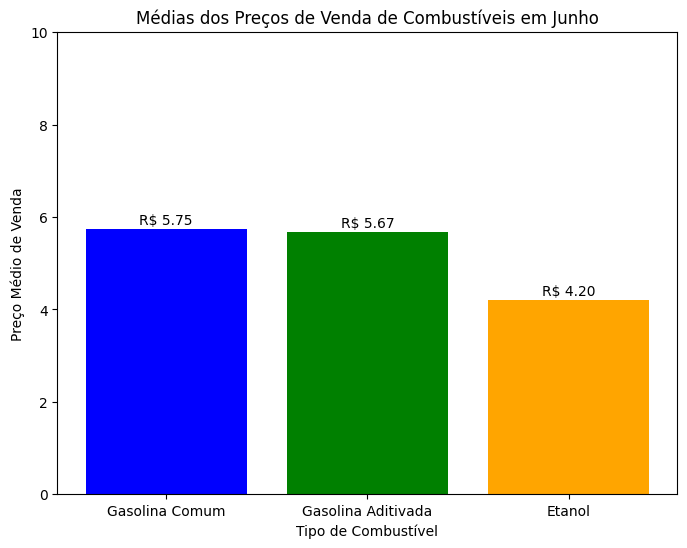

In [334]:
# Dados de médias dos preços de venda
combustiveis = ['Gasolina Comum', 'Gasolina Aditivada', 'Etanol']
medias = [5.75, 5.67, 4.20]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(combustiveis, medias, color=['blue', 'green', 'orange'])
plt.xlabel('Tipo de Combustível')
plt.ylabel('Preço Médio de Venda')
plt.title('Médias dos Preços de Venda de Combustíveis em Junho')

# Adicionar os valores das médias como rótulos nas barras
for i, media in enumerate(medias):
    plt.text(i, media + 0.1, f'R$ {media:.2f}', ha='center')

plt.ylim(0, 10)
plt.show()

**- PERGUNTA 3**

3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

Estados com preco mais caro GASOLINA COMUM JULHO 2023

In [166]:


#código para calcular o preço médio da gasolina comum por estado
grouped = gasolinaComumJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: x.str.replace(',', '').astype(int).mean())
grouped = grouped.rename('Preço Médio')
#No código acima, estou usando a função apply para aplicar uma função lambda que remove as vírgulas das strings e converte os valores em números de ponto flutuante (float) antes de calcular a média.

# Ordenando os estados pelo preço médio de gasolina
estados_gasolina_comum_mais_caros = grouped.sort_values(ascending=False).head(27) /100
estados_gasolina_comum_mais_caros.round(2)


EstadoSigla
AC    6.13
AM    6.06
CE    5.87
RO    5.85
RN    5.81
ES    5.76
BA    5.74
RR    5.72
SC    5.69
TO    5.67
RS    5.64
RJ    5.57
DF    5.56
GO    5.55
PE    5.51
PB    5.51
PR    5.48
AL    5.43
MT    5.43
PI    5.39
SP    5.39
MG    5.37
SE    5.36
MS    5.35
AP    5.28
MA    5.27
PA    5.09
Name: Preço Médio, dtype: float64

- 5 Estados com a Gasolina Comum mais cara no mes de julho

In [167]:
cincoEstadosGasolinaComumMaisCaraJulho = grouped.sort_values(ascending=False).head(5) /100
cincoEstadosGasolinaComumMaisCaraJulho

EstadoSigla
AC    6.129619
AM    6.059650
CE    5.874595
RO    5.849157
RN    5.805941
Name: Preço Médio, dtype: float64

- PERGUNTA 4


4. Qual o preço médio da gasolina e do etanol por estado?

- Calculando o preco medio da gasolina comum em Julho

In [156]:


#código para calcular o preço médio da gasolina comum por estado
grouped = gasolinaComumJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina
print(precos_gasolina_por_estado)


   EstadoSigla  Preço Médio Gasolina
0           AC                  6.13
1           AL                  5.43
2           AM                  6.06
3           AP                  5.28
4           BA                  5.74
5           CE                  5.87
6           DF                  5.56
7           ES                  5.76
8           GO                  5.55
9           MA                  5.27
10          MG                  5.37
11          MS                  5.35
12          MT                  5.43
13          PA                  5.09
14          PB                  5.51
15          PE                  5.51
16          PI                  5.39
17          PR                  5.48
18          RJ                  5.57
19          RN                  5.81
20          RO                  5.85
21          RR                  5.72
22          RS                  5.64
23          SC                  5.69
24          SE                  5.36
25          SP                  5.39
2

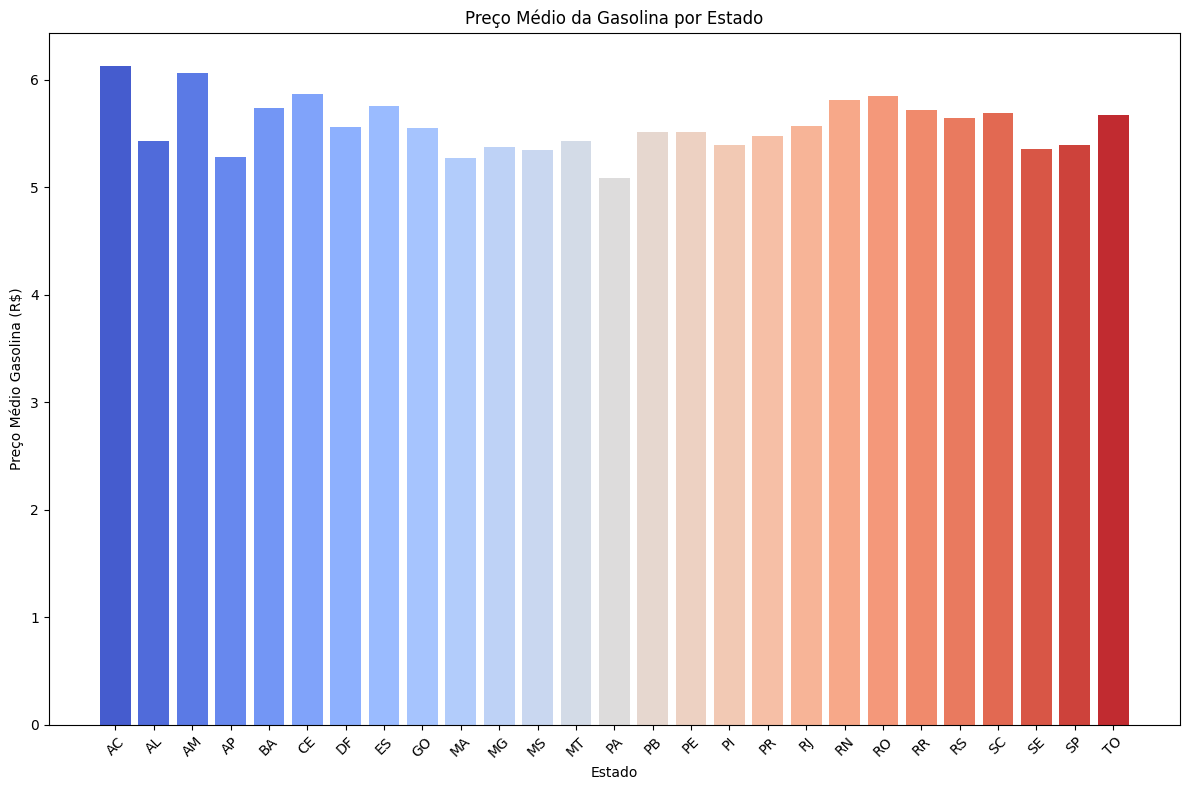

In [163]:



# código para calcular o preço médio da gasolina comum em julho por estado
grouped = gasolinaComumJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de gasolina
precos_gasolina_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'] / 100
precos_gasolina_por_estado['Preço Médio Gasolina'] = precos_gasolina_por_estado['Preço Médio Gasolina'].round(2)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_gasolina_por_estado['EstadoSigla'], precos_gasolina_por_estado['Preço Médio Gasolina'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Gasolina (R$)')
plt.title('Preço Médio da Gasolina por Estado')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


- Calculando valor Medio do Etanol por Estado

In [172]:
#código para calcular o preço médio do Etanol por estado
grouped = etanolJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios do Etanol
precos_etanol_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Etanol': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_etanol_por_estado['Preço Médio Etanol'] = precos_etanol_por_estado['Preço Médio Etanol'] / 100
precos_etanol_por_estado['Preço Médio Etanol'] = precos_etanol_por_estado['Preço Médio Etanol'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios do etanol
print(precos_etanol_por_estado)

   EstadoSigla  Preço Médio Etanol
0           AC                4.56
1           AL                4.52
2           AM                4.69
3           AP                5.31
4           BA                4.46
5           CE                4.69
6           DF                3.85
7           ES                4.42
8           GO                3.73
9           MA                4.25
10          MG                3.75
11          MS                3.64
12          MT                3.39
13          PA                4.45
14          PB                4.36
15          PE                4.28
16          PI                4.28
17          PR                3.94
18          RJ                4.35
19          RN                4.57
20          RO                5.04
21          RR                5.15
22          RS                4.77
23          SC                4.61
24          SE                4.37
25          SP                3.61
26          TO                4.08


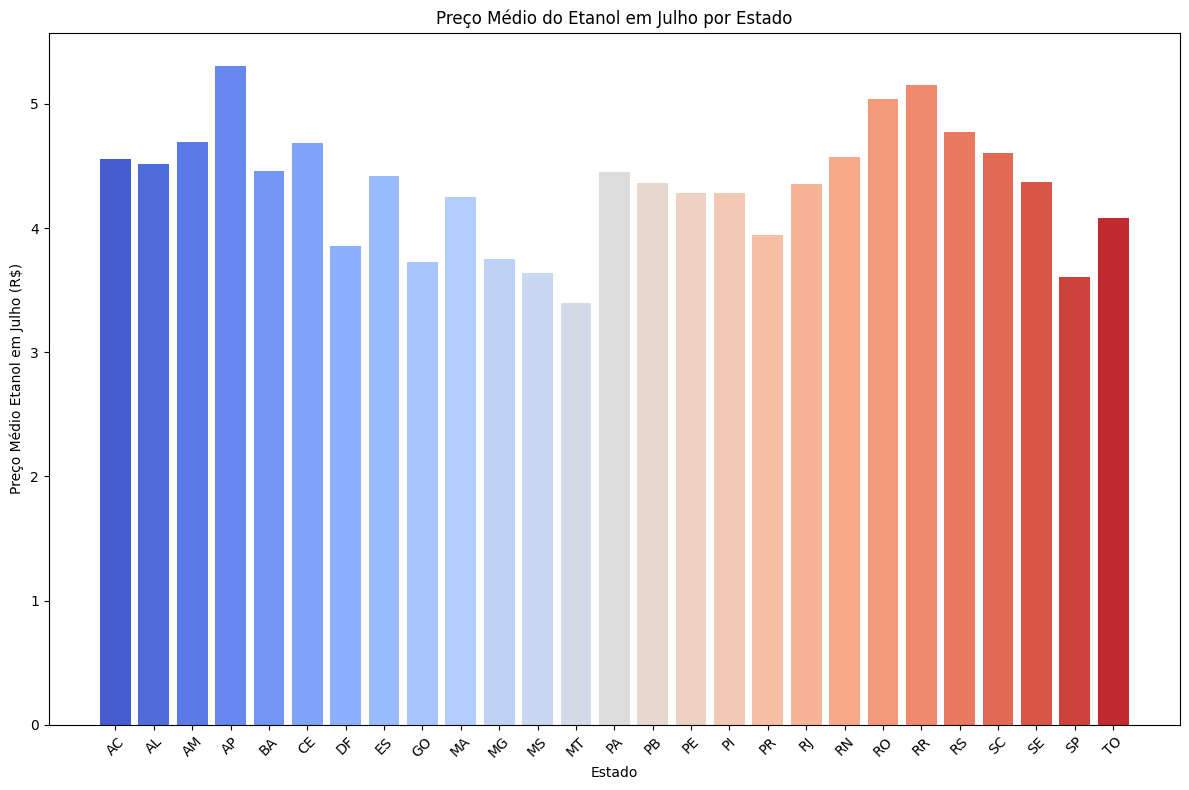

In [175]:


# código para calcular o preço médio do Etanol por estado
grouped = etanolJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios do etanol
precos_etanol_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_etanol_por_estado['Preço Médio'] = precos_etanol_por_estado['Preço Médio'] / 100
precos_gasolina_por_estado['Preço Médio'] = precos_etanol_por_estado['Preço Médio'].round(2)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_etanol_por_estado['EstadoSigla'], precos_etanol_por_estado['Preço Médio'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio Etanol em Julho (R$)')
plt.title('Preço Médio do Etanol em Julho por Estado')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

- calculando valor medio da Gasolina Aditivada em Julho

In [195]:


# Código para calcular o preço médio da gasolina Aditivada por estado em Julho
grouped = gasolinaAditivadaJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios de Gasolina Aditivada
precos_gasolina_aditivada_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio Gasolina Aditivada': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_aditivada_por_estado['Preço Médio Gasolina Aditivada'] = precos_gasolina_aditivada_por_estado['Preço Médio Gasolina Aditivada'] / 100
precos_gasolina_aditivada_por_estado['Preço Médio Gasolina Aditivada'] = precos_gasolina_aditivada_por_estado['Preço Médio Gasolina Aditivada'].round(2)

# Exibindo o DataFrame com todos os estados e seus valores médios de gasolina Aditivada
print(precos_gasolina_aditivada_por_estado)


   EstadoSigla  Preço Médio Gasolina Aditivada
0           AC                            5.82
1           AL                            5.78
2           AM                            6.39
3           AP                            4.90
4           BA                            5.83
5           CE                            5.95
6           DF                            5.51
7           ES                            5.90
8           GO                            5.69
9           MA                            5.24
10          MG                            5.46
11          MS                            5.56
12          MT                            5.53
13          PA                            5.34
14          PB                            5.59
15          PE                            5.42
16          PI                            5.54
17          PR                            5.69
18          RJ                            5.71
19          RN                            5.80
20          R

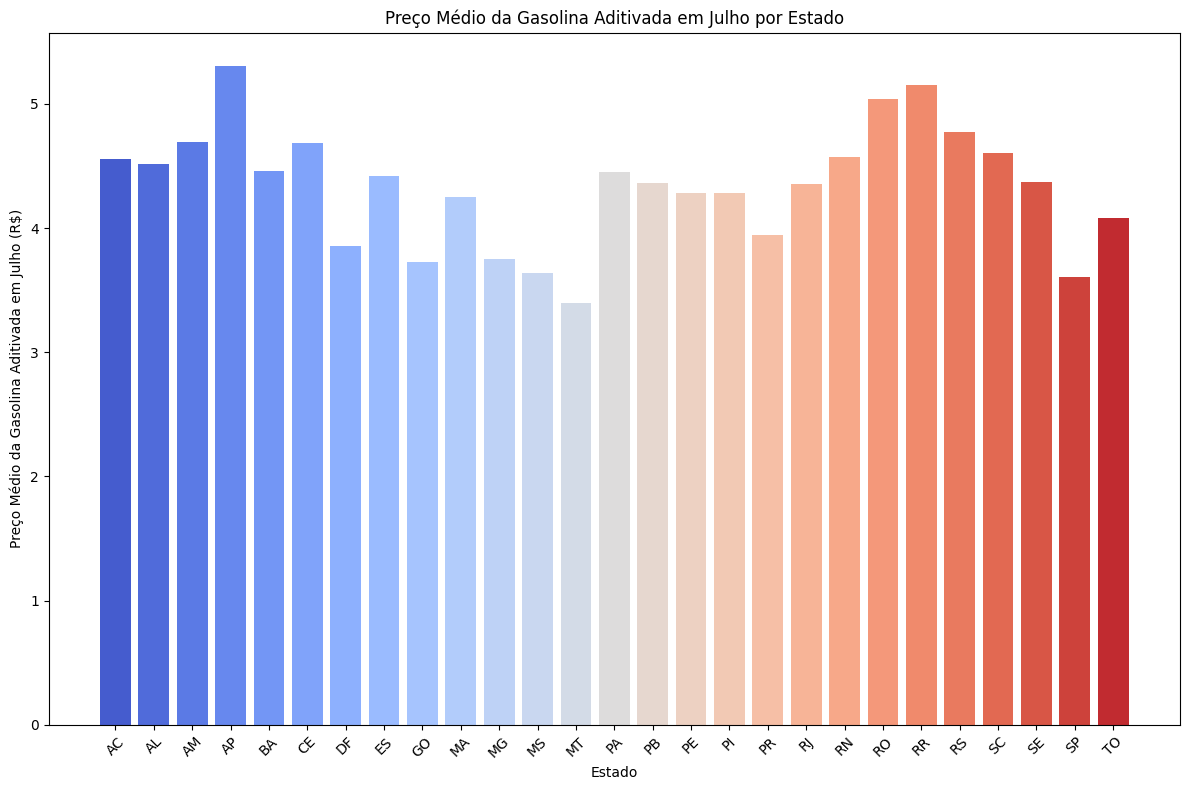

In [199]:
# código para calcular o preço médio do Etanol por estado
grouped = gasolinaAditivadaJulho.groupby('EstadoSigla')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', '').replace(' ', ''), errors='coerce').mean())
grouped = grouped.rename('Preço Médio')

# Criando um DataFrame com os estados e seus valores médios do etanol
precos_gasolina_aditivada_por_estado = pd.DataFrame({
    'EstadoSigla': grouped.index,
    'Preço Médio': grouped.values
})

# Convertendo os valores para reais e formatando com duas casas decimais
precos_gasolina_aditivada_por_estado['Preço Médio'] = precos_gasolina_aditivada_por_estado['Preço Médio'] / 100
precos_gasolina_aditivada_por_estado['Preço Médio'] = precos_gasolina_aditivada_por_estado['Preço Médio'].round(2)

# Definindo uma paleta de cores para os estados
cores = sns.color_palette("coolwarm", n_colors=len(precos_gasolina_aditivada_por_estado))

# Criando o gráfico
plt.figure(figsize=(12, 8))
plt.bar(precos_etanol_por_estado['EstadoSigla'], precos_etanol_por_estado['Preço Médio'], color=cores)
plt.xlabel('Estado')
plt.ylabel('Preço Médio da Gasolina Aditivada em Julho (R$)')
plt.title('Preço Médio da Gasolina Aditivada em Julho por Estado')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

- Pergunta 5

5. Qual o município que possui o menor preço para a gasolina e para o etanol?

- Limpando dados para filtrar desvio padrao

In [266]:

# Código para calcular o preço mínimo da gasolina comum por Município
grouped = gasolinaComumJulho.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Exibindo os resultados formatados
print("Municípios com os preços mínimos de gasolina comum em julho mais baratos (após filtragem):")
print(municipios_gasolina_mais_baratos_filtrados.apply(lambda x: f'R$ {x:.2f}'))


Municípios com os preços mínimos de gasolina comum em julho mais baratos (após filtragem):
Municipio
SOROCABA                 R$ 4.58
DIADEMA                  R$ 4.59
ITAQUAQUECETUBA          R$ 4.69
POA                      R$ 4.69
MOGI DAS CRUZES          R$ 4.69
ARARAQUARA               R$ 4.69
SAO CAETANO DO SUL       R$ 4.74
SANTA BARBARA D'OESTE    R$ 4.74
HORTOLANDIA              R$ 4.74
MOCOCA                   R$ 4.75
LIMEIRA                  R$ 4.75
GUARULHOS                R$ 4.77
SUMARE                   R$ 4.78
MATAO                    R$ 4.78
SALTO                    R$ 4.79
LEME                     R$ 4.79
PRESIDENTE PRUDENTE      R$ 4.79
ATIBAIA                  R$ 4.79
ARAPONGAS                R$ 4.79
ITU                      R$ 4.79
FRANCA                   R$ 4.79
PAULINIA                 R$ 4.79
AMERICANA                R$ 4.79
TAUBATE                  R$ 4.79
INDAIATUBA               R$ 4.82
VALINHOS                 R$ 4.84
SANTOS                   R$ 4.84
ITAPEVA 

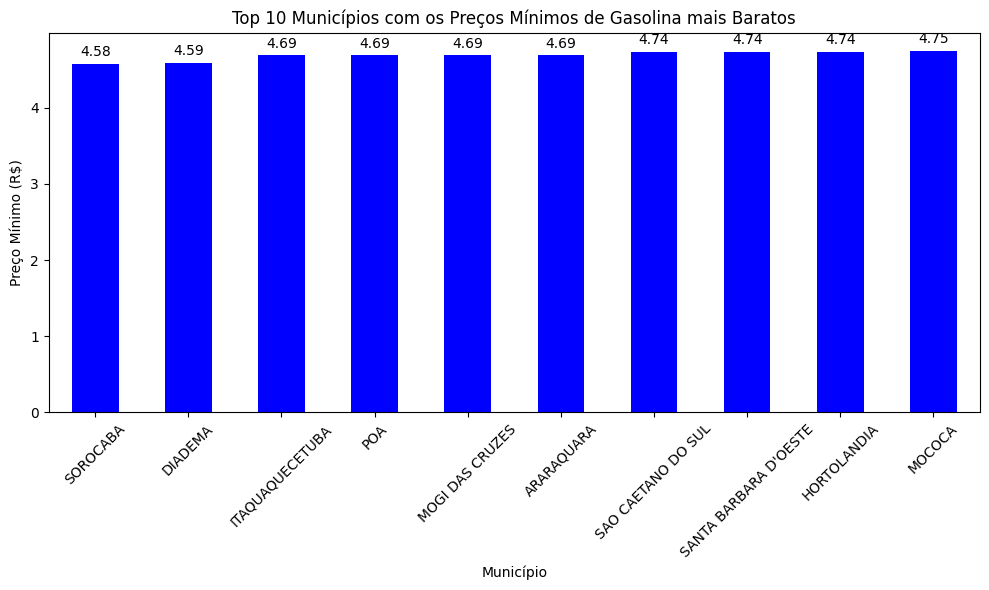

In [268]:

# Código para calcular o preço mínimo da gasolina comum por Município
grouped = gasolinaComumJulho.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').min())
grouped = grouped.rename('Preço Mínimo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_baratos_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite mínimo aceitável
limite_minimo_aceitavel = 400  # Em centavos

# Filtrando novamente para valores acima do limite mínimo aceitável
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados[municipios_gasolina_mais_baratos_filtrados >= limite_minimo_aceitavel]

# Ordenando os municípios pelo preço mínimo de gasolina em ordem ascendente
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.sort_values(ascending=True).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_baratos_filtrados = municipios_gasolina_mais_baratos_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_baratos_filtrados.plot(kind='bar', color='blue')
plt.title('Top 10 Municípios com os Preços Mínimos de Gasolina mais Baratos')
plt.xlabel('Município')
plt.ylabel('Preço Mínimo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

plt.tight_layout()

# Exibindo o gráfico
plt.show()


- Pergunta 06

6. Qual o município que possui o maior preço para a gasolina e para o etanol?

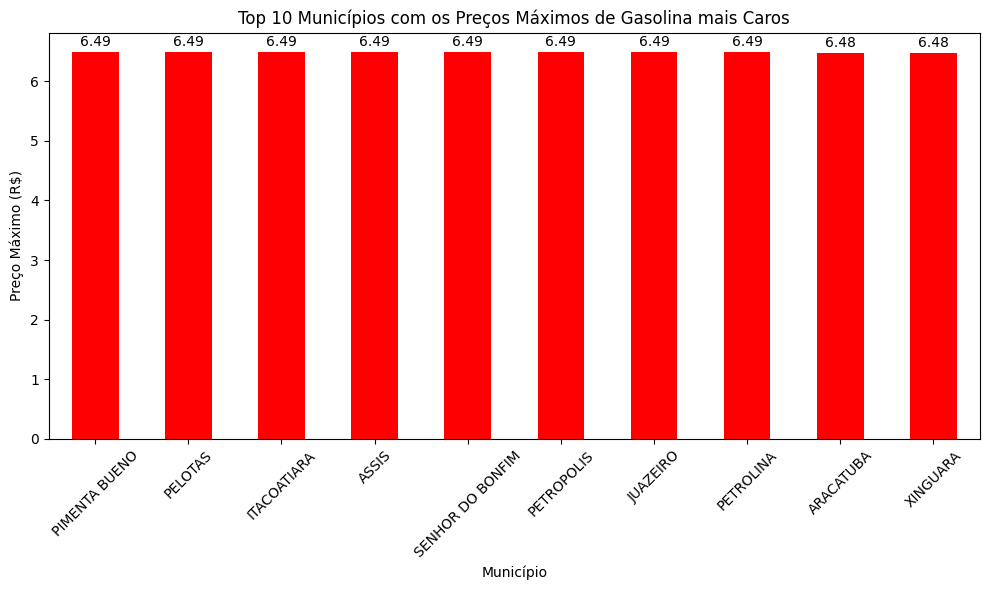

In [269]:

# Código para calcular o preço máximo da gasolina comum por Município
grouped = gasolinaComumJulho.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(10) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = municipios_gasolina_mais_caros_filtrados.plot(kind='bar', color='red')
plt.title('Top 10 Municípios com os Preços Máximos de Gasolina mais Caros')
plt.xlabel('Município')
plt.ylabel('Preço Máximo (R$)')
plt.xticks(rotation=45)

# Exibindo os valores nos topos das barras
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, f'{i.get_height():.2f}', ha='center')

plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [270]:


# Código para calcular o preço máximo da gasolina comum por Município
grouped = gasolinaComumJulho.groupby('Municipio')['Valor de Venda'].apply(lambda x: pd.to_numeric(x.str.replace(',', '').replace('.', ''), errors='coerce').max())
grouped = grouped.rename('Preço Máximo')

# Calculando o limite superior e inferior com base no desvio padrão
mean = grouped.mean()
std = grouped.std()
limite_superior = mean + 2 * std
limite_inferior = mean - 2 * std

# Filtrando os valores que estão dentro dos limites
municipios_gasolina_mais_caros_filtrados = grouped[(grouped >= limite_inferior) & (grouped <= limite_superior)]

# Definindo um limite máximo aceitável
limite_maximo_aceitavel = 700  # Em centavos

# Filtrando novamente para valores abaixo do limite máximo aceitável
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados[municipios_gasolina_mais_caros_filtrados <= limite_maximo_aceitavel]

# Ordenando os municípios pelo preço máximo de gasolina em ordem descendente
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.sort_values(ascending=False).head(30) / 100  # Convertendo para reais
municipios_gasolina_mais_caros_filtrados = municipios_gasolina_mais_caros_filtrados.round(2)  # Arredondando para duas casas decimais

# Criando o DataFrame com os valores máximos de gasolina por município
df_maximos_gasolina = pd.DataFrame({
    'Município': municipios_gasolina_mais_caros_filtrados.index,
    'Preço Máximo Gasolina': municipios_gasolina_mais_caros_filtrados.values
})

# Exibindo o DataFrame
print(df_maximos_gasolina)


              Município  Preço Máximo Gasolina
0         PIMENTA BUENO                   6.49
1               PELOTAS                   6.49
2           ITACOATIARA                   6.49
3                 ASSIS                   6.49
4      SENHOR DO BONFIM                   6.49
5            PETROPOLIS                   6.49
6              JUAZEIRO                   6.49
7             PETROLINA                   6.49
8             ARACATUBA                   6.48
9              XINGUARA                   6.48
10            ARARIPINA                   6.39
11           RIO BRANCO                   6.39
12              DIADEMA                   6.39
13  SAO JOSE DOS CAMPOS                   6.39
14   SAO CAETANO DO SUL                   6.39
15            JI-PARANA                   6.38
16            SALGUEIRO                   6.37
17   BALNEARIO CAMBORIU                   6.36
18              CAETITE                   6.34
19             ALENQUER                   6.34
20           

- Pergunta 7

7. Qual a região que possui o maior valor médio da gasolina?

In [274]:

# Filtrando os dados apenas para gasolina
gasolina_data = gasolinaComumJulho[gasolinaComumJulho['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Calculando o valor médio da gasolina por região
valor_medio_por_regiao = gasolina_data.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o maior valor médio da gasolina
regiao_maior_valor_medio = valor_medio_por_regiao.idxmax()
valor_maior_valor_medio = valor_medio_por_regiao.max()/100# Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o maior valor médio da gasolina é {regiao_maior_valor_medio} com valor médio de R$ {valor_maior_valor_medio:.2f}")


A região com o maior valor médio da gasolina é NE com valor médio de R$ 5.60


- Pergunta 8

8. Qual a região que possui o menor valor médio do etanol?

In [275]:
# Filtrando os dados apenas para etanol
etanol_data = etanolJulho[etanolJulho['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Calculando o valor médio do etanol por região
valor_medio_por_regiao_etanol = etanol_data.groupby('RegiaoSigla')['Valor de Venda'].mean()

# Encontrando a região com o menor valor médio do etanol
regiao_menor_valor_medio_etanol = valor_medio_por_regiao_etanol.idxmin()
valor_menor_valor_medio_etanol = valor_medio_por_regiao_etanol.min()/100  # Convertendo para formato em Reais

# Exibindo o resultado
print(f"A região com o menor valor médio do etanol é {regiao_menor_valor_medio_etanol} com valor médio de R$ {valor_menor_valor_medio_etanol:.2f}")


A região com o menor valor médio do etanol é CO com valor médio de R$ 3.67


In [279]:
# Encontrando o menor valor na coluna "Valor de Venda"
etanolJulho['Valor de Venda'].min()


'2,79'

- Pergunta 9

9 - Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

Para verificar se há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido, você pode calcular o coeficiente de correlação entre essas variáveis. O coeficiente de correlação mede a relação linear entre duas variáveis e varia de -1 a 1. Um valor próximo de 1 indica uma correlação positiva forte, um valor próximo de -1 indica uma correlação negativa forte, e um valor próximo de 0 indica pouca ou nenhuma correlação.

Aqui está um exemplo de como você pode calcular e interpretar a correlação entre o valor da gasolina e a região:

In [285]:


# Filtrar apenas os dados de gasolina
gasolina_data = mes07[mes07['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_data = gasolina_data.copy()

# Criar um mapeamento numérico para as regiões
regioes_numericas = {regiao: indice for indice, regiao in enumerate(gasolina_data['RegiaoSigla'].unique())}

# Aplicar o mapeamento numérico às regiões
gasolina_data['RegiaoNumerica'] = gasolina_data['RegiaoSigla'].map(regioes_numericas)

# Calcular a correlação entre o valor da gasolina e a região numérica
correlacao_gasolina = gasolina_data['Valor de Venda'].corr(gasolina_data['RegiaoNumerica'])

# Exibir a correlação
print(f"Correlação entre o valor da gasolina e a região: {correlacao_gasolina:.2f}")


Correlação entre o valor da gasolina e a região: 0.08


<ipython-input-285-a7ef375a19ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


- ETANOL JULHO

In [286]:
# Filtrar apenas os dados de etanol
etanol_data = mes07[mes07['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
etanol_data = etanol_data.copy()

# Criar um mapeamento numérico para as regiões
regioes_numericas = {regiao: indice for indice, regiao in enumerate(etanol_data['RegiaoSigla'].unique())}

# Aplicar o mapeamento numérico às regiões
etanol_data['RegiaoNumerica'] = etanol_data['RegiaoSigla'].map(regioes_numericas)

# Calcular a correlação entre o valor do etanol e a região numérica
correlacao_etanol = etanol_data['Valor de Venda'].corr(etanol_data['RegiaoNumerica'])

# Exibir a correlação
print(f"Correlação entre o valor do etanol e a região: {correlacao_etanol:.2f}")

Correlação entre o valor do etanol e a região: 0.23


<ipython-input-286-20f173f9f19a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


- Pergunta 10

10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

Para calcular a correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende o combustível, você pode seguir um procedimento semelhante ao que fizemos anteriormente para calcular a correlação com as regiões. Primeiro, você precisará criar um mapeamento numérico para as bandeiras, depois calcular a correlação entre os valores do combustível e as bandeiras numéricas.

In [288]:


# Filtrar apenas os dados de gasolina
gasolina_data = mes07[mes07['Produto'] == 'GASOLINA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_data = gasolina_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(gasolina_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
gasolina_data['BandeiraNumerica'] = gasolina_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor da gasolina e a bandeira numérica
correlacao_gasolina = gasolina_data['Valor de Venda'].corr(gasolina_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor da gasolina e a bandeira: {correlacao_gasolina:.2f}")


Correlação entre o valor da gasolina e a bandeira: 0.04


<ipython-input-288-d8aa610e2a7c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_data['Valor de Venda'] = pd.to_numeric(gasolina_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


In [289]:
# Filtrar apenas os dados de etanol
etanol_data = mes07[mes07['Produto'] == 'ETANOL']

# Convertendo os valores de "Valor de Venda" para numéricos
etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
etanol_data = etanol_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(etanol_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
etanol_data['BandeiraNumerica'] = etanol_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor do etanol e a bandeira numérica
correlacao_etanol = etanol_data['Valor de Venda'].corr(etanol_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor do etanol e a bandeira: {correlacao_etanol:.2f}")


Correlação entre o valor do etanol e a bandeira: 0.08


<ipython-input-289-265f162c4613>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  etanol_data['Valor de Venda'] = pd.to_numeric(etanol_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


In [290]:
# Filtrar apenas os dados de gasolina aditivada
gasolina_aditivada_data = mes07[mes07['Produto'] == 'GASOLINA ADITIVADA']

# Convertendo os valores de "Valor de Venda" para numéricos
gasolina_aditivada_data['Valor de Venda'] = pd.to_numeric(gasolina_aditivada_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')

# Criar uma cópia do DataFrame para evitar o aviso SettingWithCopyWarning
gasolina_aditivada_data = gasolina_aditivada_data.copy()

# Criar um mapeamento numérico para as bandeiras
bandeiras_numericas = {bandeira: indice for indice, bandeira in enumerate(gasolina_aditivada_data['Bandeira'].unique())}

# Aplicar o mapeamento numérico às bandeiras
gasolina_aditivada_data['BandeiraNumerica'] = gasolina_aditivada_data['Bandeira'].map(bandeiras_numericas)

# Calcular a correlação entre o valor da gasolina aditivada e a bandeira numérica
correlacao_gasolina_aditivada = gasolina_aditivada_data['Valor de Venda'].corr(gasolina_aditivada_data['BandeiraNumerica'])

# Exibir a correlação formatada
print(f"Correlação entre o valor da gasolina aditivada e a bandeira: {correlacao_gasolina_aditivada:.2f}")


Correlação entre o valor da gasolina aditivada e a bandeira: 0.03


<ipython-input-290-cbfe06f23d3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasolina_aditivada_data['Valor de Venda'] = pd.to_numeric(gasolina_aditivada_data['Valor de Venda'].str.replace(',', '').replace('.', ''), errors='coerce')


- PERGUNTA EXTRA 1

EXISTE ALGUMA BANDEIRA QUE ATUA EM MAIS DE ALGUM ESTADO ?

In [293]:
# Verificar se existe alguma bandeira que atua em mais de um estado
bandeiras_por_estado = mes07.groupby('Bandeira')['EstadoSigla'].nunique()

# Filtrar as bandeiras que atuam em mais de um estado
bandeiras_multiestado = bandeiras_por_estado[bandeiras_por_estado > 1]

# Ordenar as bandeiras pelo número de estados em ordem decrescente
bandeiras_multiestado = bandeiras_multiestado.sort_values(ascending=False)

# Exibir as bandeiras que atuam em mais de um estado
if not bandeiras_multiestado.empty:
    print("Bandeiras que atuam em mais de um estado:")
    print(bandeiras_multiestado)
else:
    print("Nenhuma bandeira atua em mais de um estado.")


Bandeiras que atuam em mais de um estado:
Bandeira
VIBRA ENERGIA          27
BRANCA                 27
VIBRA                  27
IPIRANGA               26
RAIZEN                 23
ALESAT                 19
SABBÁ                   7
ATEM' S                 5
RODOIL                  4
DISLUB                  4
IDAZA                   3
CIAPETRO                3
TOTALENERGIES           3
SP                      3
POTENCIAL               3
MAXSUL                  3
EQUADOR                 3
RIO BRANCO              2
SETTA DISTRIBUIDORA     2
PETROBAHIA              2
STANG                   2
TEMAPE                  2
FAN                     2
Name: EstadoSigla, dtype: int64


- SUGESTAO PERGUNTA 2 EXTRA

EM JULHO COMPENSOU ABASTECER MAIS COM ETANOL OU GASOLINA ?

O cálculo básico para se descobrir se o álcool é vantajoso ou não em relação à gasolina é simples. Basta dividir o preço do litro do álcool pelo da gasolina. Se o resultado for inferior a 0,7, use álcool. Se for maior que 0,7, então abasteça com gasolina.

In [301]:
print(f"A média formatada dos preços de venda da Gasolina Comum em Julho é: {mediaFormatadaGasolinaComum}")

A média formatada dos preços de venda da Gasolina Comum em Julho é: 5.77


In [302]:
mediaFormatadaEtanolJulho = "{:.2f}".format(mediaEtanolJulho)
media_arredondada = round(mediaEtanolJulho, 2)# utilizado comando round para arredondar a media para facilitar operacoes com outros valores
print(f"A média formatada dos preços de venda do etanol em Julho é: {media_arredondada}")
media_arredondada = round(mediaEtanolJulho, 2)

A média formatada dos preços de venda do etanol em Julho é: 4.12


- SUGESTAO PERGUNTA 3 EXTRA

EM JULHO COMPENSOU ABASTECER MAIS COM ETANOL OU GASOLINA ?